# Reporte de Análisis VII

## Creando Agrupamientos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [3]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
6,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
8,Departamento,Pachacámac,1,0,0,36,1200.0,NaN,NaN
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0


#### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [4]:
datos['Valor'].mean()

4985.730140445705

In [5]:
barrios = ['Ate','Barranco','Comas','Lince','El Agustino','San Luis','Callao']
seleccion = datos['Distrito'].isin(barrios)
datos = datos[seleccion]

In [6]:
datos['Distrito'].drop_duplicates()

3             Ate
4        Barranco
5           Comas
7     El Agustino
14       San Luis
15         Callao
24          Lince
Name: Distrito, dtype: object

In [7]:
grupo_barrio = datos.groupby('Distrito')

In [8]:
type(grupo_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
grupo_barrio.groups

{'Ate': [3, 6, 16, 18, 23, 32, 34, 37, 44, 45, 58, 63, 64, 65, 67, 71, 77, 82, 85, 97, 111, 114, 116, 122, 133, 136, 138, 142, 156, 159, 161, 171, 172, 180, 195, 198, 217, 224, 231, 234, 243, 246, 249, 254, 269, 275, 285, 287, 302, 303, 304, 306, 313, 319, 322, 336, 346, 347, 356, 371, 377, 379, 385, 391, 398, 400, 411, 423, 429, 444, 445, 447, 448, 451, 461, 463, 474, 475, 477, 485, 488, 497, 508, 514, 518, 526, 532, 553, 554, 555, 556, 559, 563, 568, 570, 571, 572, 601, 605, 606, ...], 'Barranco': [4, 179, 1056, 1192, 1721, 2054, 2141, 2699, 2808, 3072, 3364, 3795, 4891, 4934, 5409, 5647, 6288, 6647, 7616, 7990, 9367, 9847, 9889, 10197, 10457, 11182, 11420, 11745, 11860, 12093, 12529, 12597, 12611, 13184, 13821, 13910, 14774, 15551, 16580, 16881, 17786, 18385, 19336, 19389, 19430, 20168, 20651, 21060, 21597, 21628, 21648, 21649, 22053, 22099, 22268], 'Callao': [15, 61, 87, 110, 128, 141, 162, 169, 197, 214, 232, 282, 316, 317, 357, 394, 467, 504, 549, 623, 709, 721, 804, 838, 887, 90

In [10]:
for barrio, data in grupo_barrio:
    print('{} -> {}'.format(barrio, data.Valor.mean()))

Ate -> 6924.272975658221
Barranco -> 1343.2727272727273
Callao -> 4764.564315352697
Comas -> 8655.839756592291
El Agustino -> 1091.7720588235295
Lince -> 1462.2043422733077
San Luis -> 1705.5948717948718


In [11]:
grupo_barrio[['Valor', 'Mantenimiento']].mean().round(2)

,Valor,Mantenimiento
Distrito,,
Ate,6924.27,3568.95
Barranco,1343.27,381.75
Callao,4764.56,715.67
Comas,8655.84,2107.56
El Agustino,1091.77,298.87
Lince,1462.20,528.62
San Luis,1705.59,518.60


## Estadísticas Descriptivas

In [12]:
grupo_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,4026.0,6924.27,11687.87,100.0,2500.0,4300.0,8500.0,600000.0
Barranco,55.0,1343.27,1391.96,450.0,775.0,1100.0,1200.0,8000.0
Callao,482.0,4764.56,44080.45,500.0,1200.0,1700.0,2200.0,800000.0
Comas,1972.0,8655.84,8196.43,400.0,3800.0,6500.0,10000.0,90000.0
El Agustino,136.0,1091.77,525.54,500.0,800.0,1000.0,1200.0,4500.0
Lince,783.0,1462.20,1363.86,300.0,800.0,1100.0,1700.0,15000.0
San Luis,390.0,1705.59,1197.06,500.0,1000.0,1400.0,1900.0,10000.0


In [13]:
grupo_barrio['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Distrito,,
Ate,100.0,600000.0
Barranco,450.0,8000.0
Callao,500.0,800000.0
Comas,400.0,90000.0
El Agustino,500.0,4500.0
Lince,300.0,15000.0
San Luis,500.0,10000.0


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio del Alquiler por Distrito')

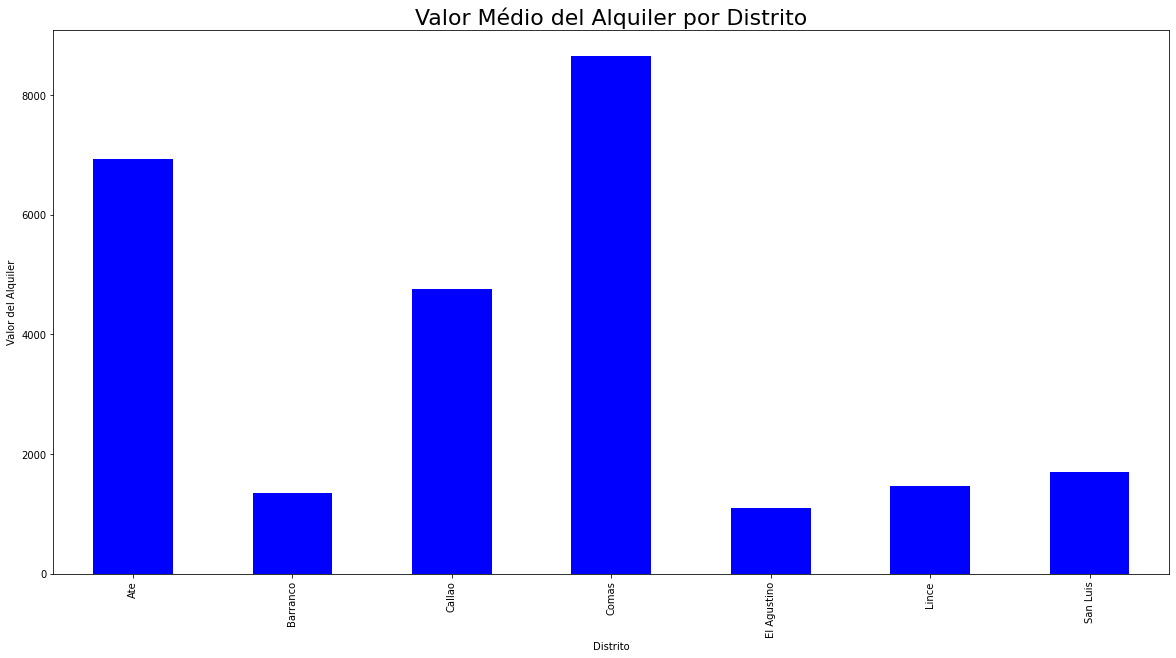

In [15]:
fig = grupo_barrio['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Médio del Alquiler por Distrito', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio del Alquiler por Distrito')

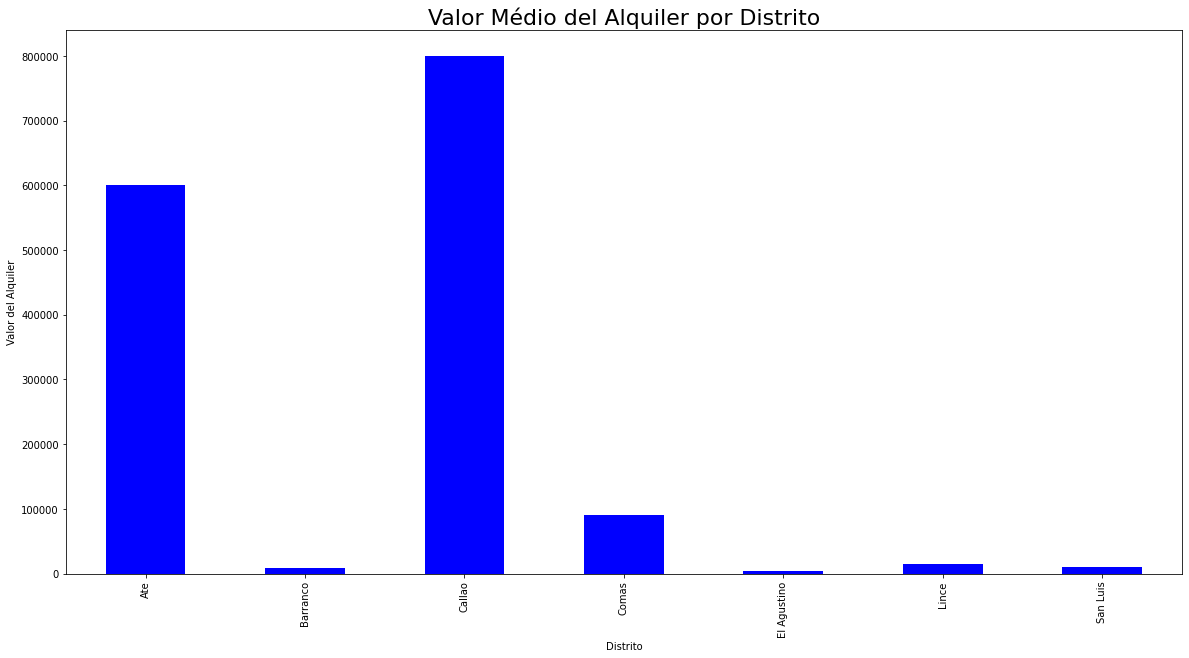

In [16]:
fig = grupo_barrio['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Médio del Alquiler por Distrito', {'fontsize': 22})